In [1]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DS_US = df[(df['job_title_short'].str.contains('Data Scientist', case=False, na=False)) & (df['job_country'] == 'United States')] .copy()

In [11]:
df_DS_US['salary_year_avg'].sort_values( ascending=False)

554784    960000.0
387378    585000.0
554140    525000.0
417241    475000.0
618461    463500.0
            ...   
785561         NaN
785569         NaN
785578         NaN
785651         NaN
785673         NaN
Name: salary_year_avg, Length: 71776, dtype: float64

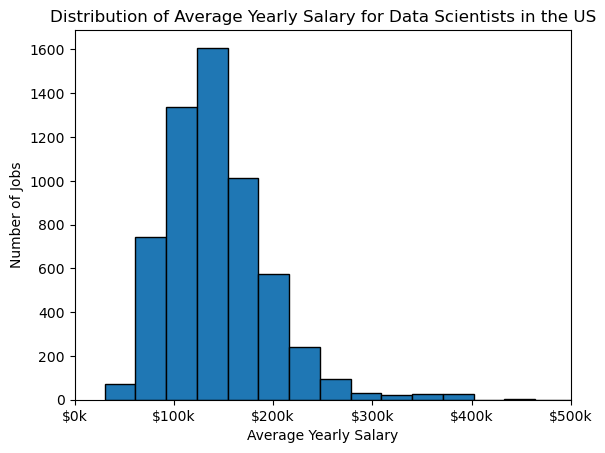

In [28]:
df_DS_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.title('Distribution of Average Yearly Salary for Data Scientists in the US')
plt.xlabel('Average Yearly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(0, 500000)
plt.figsize=(12, 6)
